In [49]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #for BoW and TF-IDF respectively
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB #for text classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


In [50]:
df = pd.read_csv("bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [51]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [52]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [53]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [54]:
df['processed_text'] = df['text'].apply(preprocess)
df.head()

,category,text,processed_text
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hands, viewers, home, theatre, sy..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, farrell, gamble, leicester, say..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raids, box, office, ocean, twe..."


Bag Of Words and TF-IDF :

In [55]:
#Bag Of Words
bow_vector = CountVectorizer()
bow = bow_vector.fit_transform(df['processed_text'].apply(' '.join))

In [56]:
#TF-IDF 
tfidf_vector = TfidfVectorizer()
tfidf = tfidf_vector.fit_transform(df['processed_text'].apply(' '.join))

Model Training:

In [57]:
x_train_bow, x_test_bow, y_train, y_test = train_test_split(bow, df['category'], random_state=42, test_size=0.2)
bow_model = MultinomialNB()
bow_model.fit(x_train_bow,y_train)

MultinomialNB()

In [58]:
x_train_tfidf, x_test_tfidf = train_test_split(tfidf, random_state=42, test_size=0.2)
tfidf_model = MultinomialNB()
tfidf_model.fit(x_train_tfidf,y_train)

MultinomialNB()

In [59]:
# Predictions using BoW model
y_pred_bow = bow_model.predict(x_test_bow)
print("BoW Model Performance:\n")
print(classification_report(y_test, y_pred_bow))

# Predictions using TF-IDF model
y_pred_tfidf = tfidf_model.predict(x_test_tfidf)
print("\nTF-IDF Model Performance:\n")
print(classification_report(y_test, y_pred_tfidf))


BoW Model Performance:

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       101
entertainment       1.00      0.91      0.95        81
     politics       0.92      0.99      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.94      0.99      0.96        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445


TF-IDF Model Performance:

               precision    recall  f1-score   support

     business       0.94      0.94      0.94       101
entertainment       1.00      0.90      0.95        81
     politics       0.93      0.98      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.99      0.97        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighte

News Classification

In [60]:
sample_text1 = "Artificial intelligence is revolutionizing the tech industry, with companies racing to develop the next big innovation."
print("Input text: ", sample_text1)

processed_sample_text = ' '.join(preprocess(sample_text1))

sample_text_bow = bow_vector.transform([processed_sample_text])
sample_text_tfidf = tfidf_vector.transform([processed_sample_text])

predicted_category_bow = bow_model.predict(sample_text_bow)
print(f"Predicted Category (BoW): {predicted_category_bow[0]}")

predicted_category_tfidf = tfidf_model.predict(sample_text_tfidf)
print(f"Predicted Category (TF-IDF): {predicted_category_tfidf[0]}")

Input text:  Artificial intelligence is revolutionizing the tech industry, with companies racing to develop the next big innovation.
Predicted Category (BoW): tech
Predicted Category (TF-IDF): tech


In [61]:
sample_text2 = "The stock market surged today as tech companies reported record earnings."
print("Input text: ", sample_text2)

processed_sample_text = ' '.join(preprocess(sample_text2))

sample_text_bow = bow_vector.transform([processed_sample_text])
sample_text_tfidf = tfidf_vector.transform([processed_sample_text])

predicted_category_bow = bow_model.predict(sample_text_bow)
print(f"Predicted Category (BoW): {predicted_category_bow[0]}")

predicted_category_tfidf = tfidf_model.predict(sample_text_tfidf)
print(f"Predicted Category (TF-IDF): {predicted_category_tfidf[0]}")

Input text:  The stock market surged today as tech companies reported record earnings.
Predicted Category (BoW): business
Predicted Category (TF-IDF): business


Visualization

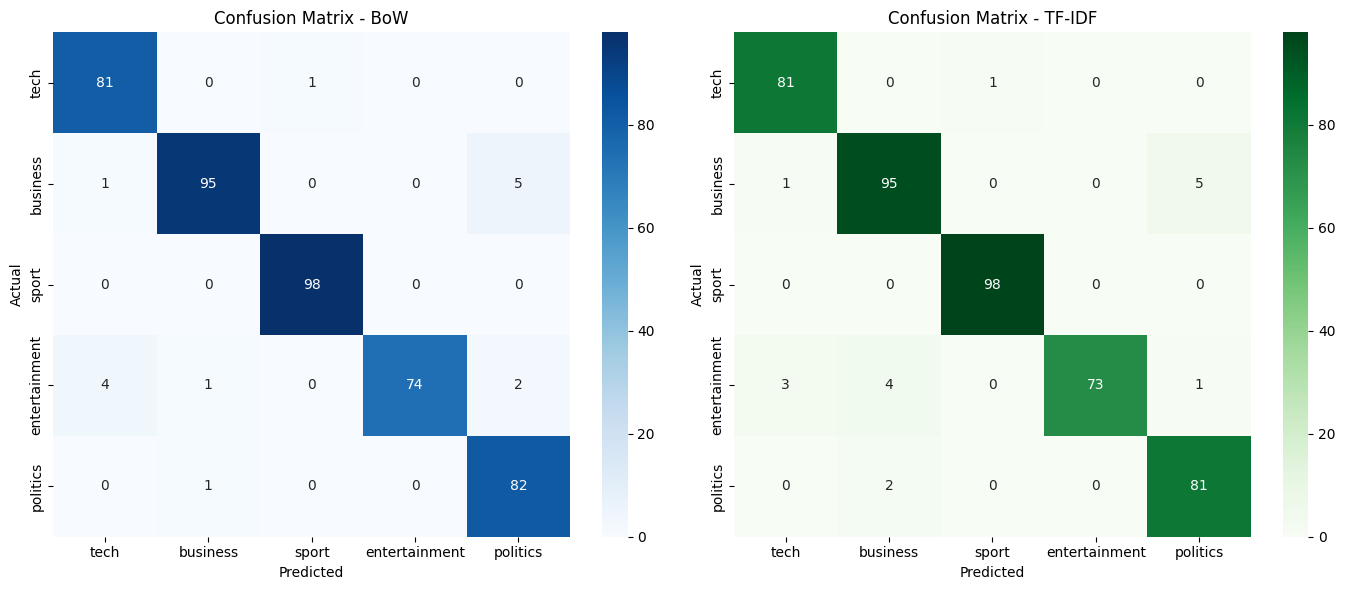

In [62]:
categories = df['category'].unique()

# Confusion matrices
cm_bow = confusion_matrix(y_test, y_pred_bow, labels=categories)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=categories)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# BoW heatmap
sns.heatmap(cm_bow, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - BoW")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# TF-IDF heatmap
sns.heatmap(cm_tfidf, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - TF-IDF")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


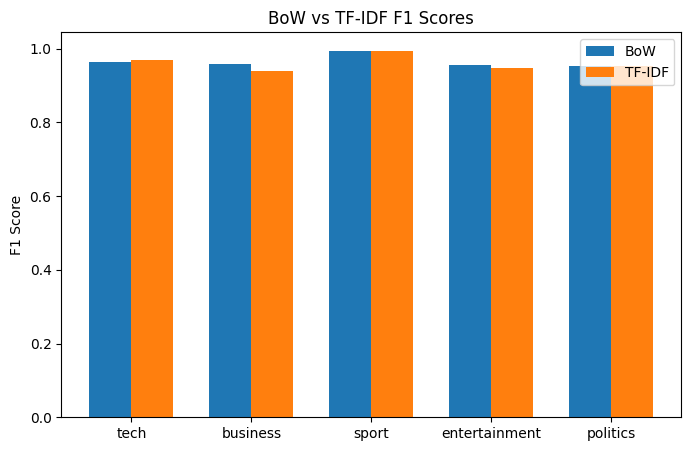

In [63]:
f1_bow = precision_recall_fscore_support(y_test, y_pred_bow, average=None, labels=categories)[2]
f1_tfidf = precision_recall_fscore_support(y_test, y_pred_tfidf, average=None, labels=categories)[2]

x = np.arange(len(categories))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, f1_bow, width, label='BoW')
plt.bar(x + width/2, f1_tfidf, width, label='TF-IDF')
plt.xticks(x, categories)
plt.ylabel('F1 Score')
plt.title('BoW vs TF-IDF F1 Scores')
plt.legend()
plt.show()
